In [1]:

import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
import os 

import re
import time



from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

import datetime


%matplotlib inline
pd.set_option("max_columns", None)



import seaborn as sns



import statistics
from statistics import mode
from collections import Counter

In [2]:
#speed data with lat and lon added
df1 = pd.read_csv ("speedClean.csv") 

In [3]:

df1["avSpeed"] = (df1["lowSpeed"]+df1["highSpeed"])/2

In [4]:
## timestamps for total df1 range from 7-2012 to 6-2016, there are 54000 or so readings


In [5]:
print(max(df1["timestamp"]),min(df1["timestamp"]),len(df1["timestamp"]))

2016-06-22 23:00:00 2012-07-31 00:00:00 54340


In [6]:
## there are speed reports from these 9 neighborhoods
print(pd.unique(df1["nhood"]), len(pd.unique(df1["nhood"])))

['SOUTH BOSTON' 'CHARLESTOWN' 'DORCHESTER' 'WEST ROXBURY' 'ROXBURY'
 'ALLSTON BRIGHTON' 'HYDE PARK' 'EAST BOSTON' 'BOSTON PROPER'] 9


In [7]:
#west rox has had the most study_ids assigned, and the highest number of readings
df1["study_id"].groupby(df1['nhood']).nunique().sort_values(ascending=False)




nhood
WEST ROXBURY        17
DORCHESTER          15
ROXBURY             12
SOUTH BOSTON         5
CHARLESTOWN          3
ALLSTON BRIGHTON     3
HYDE PARK            2
EAST BOSTON          1
BOSTON PROPER        1
Name: study_id, dtype: int64

In [8]:
df1['nhood'].value_counts() # this many readings per neigborhood

WEST ROXBURY        17160
DORCHESTER          14404
SOUTH BOSTON         7800
ROXBURY              5616
ALLSTON BRIGHTON     3432
HYDE PARK            2808
CHARLESTOWN          1560
EAST BOSTON           936
BOSTON PROPER         624
Name: nhood, dtype: int64

In [9]:
df1['highSpeed'].groupby(df1['nhood']).describe()

nhood                  
ALLSTON BRIGHTON  count     3432.000000
                  mean        42.867133
                  std         18.417954
                  min          5.000000
                  25%         29.000000
                  50%         44.000000
                  75%         59.000000
                  max         70.000000
BOSTON PROPER     count      624.000000
                  mean        43.692308
                  std         18.254001
                  min         14.000000
                  25%         29.000000
                  50%         44.000000
                  75%         59.000000
                  max         70.000000
CHARLESTOWN       count     1560.000000
                  mean        34.615385
                  std         18.135850
                  min          5.000000
                  25%         20.000000
                  50%         35.000000
                  75%         50.000000
                  max         60.000000
DORCHESTER      

In [10]:
#just break out the av high speed above
df2 = df1[['nhood','highSpeed']]
nhoodGroup = df2.groupby('nhood')

nhoodGroup.mean().sort_values(by='highSpeed',ascending=False)
#df1['highSpeed'].groupby(df1['nhood']).mean().sort_values(ascending=False)

,highSpeed
nhood,
BOSTON PROPER,43.692308
ALLSTON BRIGHTON,42.867133
ROXBURY,39.658120
DORCHESTER,36.221050
SOUTH BOSTON,36.067692
WEST ROXBURY,35.440559
CHARLESTOWN,34.615385
EAST BOSTON,34.615385
HYDE PARK,34.615385


In [11]:
#av number of readings per studyid per nhood
df1['nhood'].value_counts()/df1["study_id"].groupby(df1['nhood']).nunique().sort_values(ascending=False)




ALLSTON BRIGHTON    1144.000000
BOSTON PROPER        624.000000
CHARLESTOWN          520.000000
DORCHESTER           960.266667
EAST BOSTON          936.000000
HYDE PARK           1404.000000
ROXBURY              468.000000
SOUTH BOSTON        1560.000000
WEST ROXBURY        1009.411765
dtype: float64

In [12]:
#there are multiple most-frequent speeeds,  this just has first one per nhood but often is tied
df1.groupby('nhood')['highSpeed'].agg(lambda x: x.value_counts().index[0])

nhood
ALLSTON BRIGHTON    70.0
BOSTON PROPER       70.0
CHARLESTOWN         60.0
DORCHESTER          60.0
EAST BOSTON         60.0
HYDE PARK           60.0
ROXBURY             60.0
SOUTH BOSTON        60.0
WEST ROXBURY        60.0
Name: highSpeed, dtype: float64

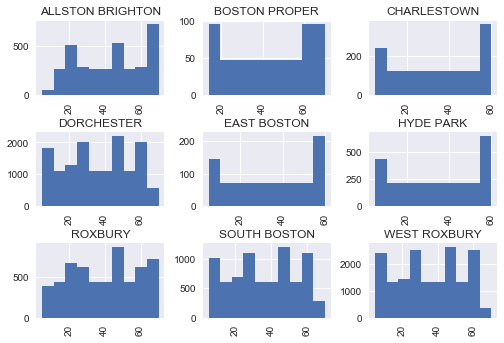

In [13]:
#speed histograms by neighborhood
import seaborn.apionly as sns

sns.set() 

df1.hist(by='nhood',column = 'highSpeed')
plt.show()

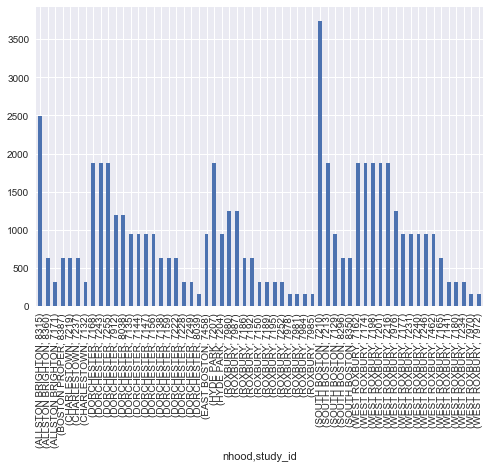

In [16]:
# number of readings per study id by neighborhood
df1["study_id"].groupby(df1['nhood']).value_counts().plot(kind="bar")
plt.show()

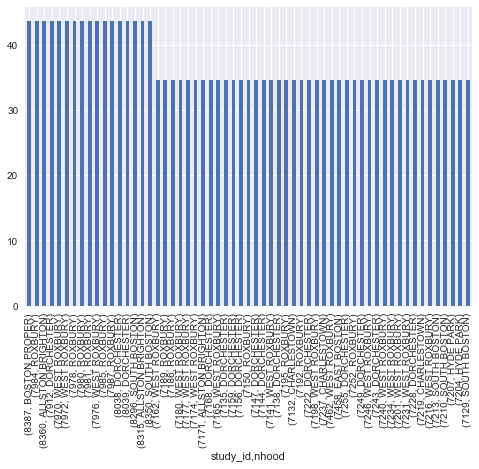

In [17]:
# average high speed per study_id ..
df1['highSpeed'].groupby([df1['study_id'],df1['nhood']]).mean().sort_values(ascending=False).plot(kind="bar")


In [21]:
#just speeds that are over 55
over55df1 = df1[(df1['highSpeed']>55)]


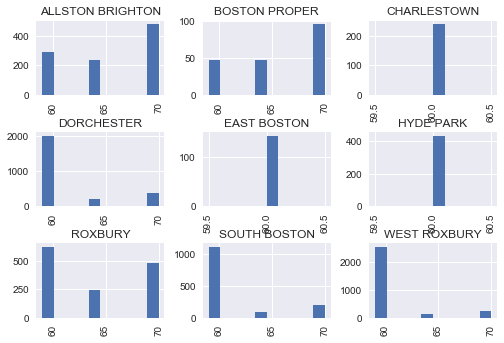

In [22]:
over55df1.hist(by='nhood',column = 'highSpeed')
plt.show()

In [23]:
a = over55df1['highSpeed'].groupby(over55df1['nhood']).count()
b = df1['highSpeed'].groupby(df1['nhood']).count()

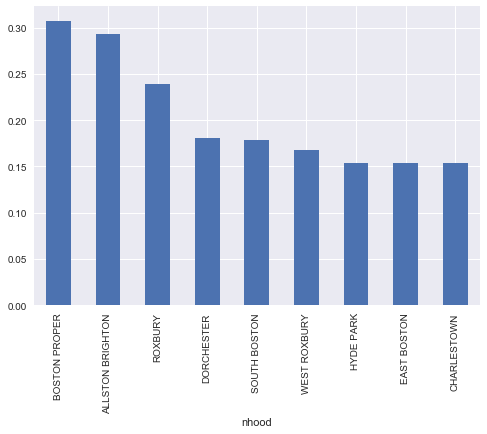

In [24]:
#percentage of total readings that are over 55 by neighborhood
c = a/b
c.sort_values(ascending=False).plot(kind='bar')



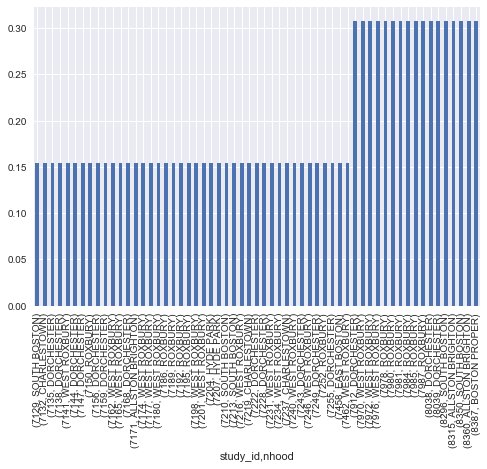

In [27]:
#percentage of over 55 by study id/nhood
d = over55df1['highSpeed'].groupby([over55df1['study_id'],over55df1['nhood']]).count() 
e = df1['highSpeed'].groupby([df1['study_id'],df1['nhood']]).count() 
f = d/e
f.plot(kind='bar')